Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [5]:
data.shape

(4531, 35)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    3975
1.0     556
dtype: int64

In [7]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [8]:
x_var = data.columns.tolist()

In [9]:
for i in ['ANY', 'NOM_DISTRICTE', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [10]:
x = data[x_var]

In [11]:
y = data['Would_not_stay_in_the_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first = True)

In [13]:
# x = sm.add_constant(x)

In [14]:
os = SMOTE(random_state=0)
columns = x.columns
os_data_x, os_data_y=os.fit_sample(x, y)
os_data_x = pd.DataFrame(data=os_data_x, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['Would_not_stay_in_the_neighborhood'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of people who would not stay in the neighborhood in oversampled data",len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood",len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in oversampled data is ",
      len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==1])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",
      len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==0])/len(os_data_x))

length of oversampled data is  7950
Number of people who would not stay in the neighborhood in oversampled data 3975
Number of people who would stay in the neighborhood 3975
Proportion of 'Would_not_stay_in_the_neighborhood' in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [15]:
os_data_x

,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,Time_living_in_barri_LESS THAN 10 YEARS,Time_living_in_barri_MORE THAN 10 YEARS,Barri_evolution_IT IS THE SAME,...,House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_< 1000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1,0.000000,1,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,1,1.000000,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,1
2,1,0.000000,1,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.000000,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0.000000,0,0,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7945,1,0.721397,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
7946,1,1.000000,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
7947,0,0.000000,1,0,0,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
7948,1,0.000000,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1


In [16]:
os_data_y['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [17]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.512861
         Iterations 6
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.260    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 8234.4833
Date:                    2021-04-15 21:28                      BIC:                 8513.7204
No. Observations:        7950                                  Log-Likelihood:      -4077.2  
Df Model:                39                                    LL-Null:             -5510.5  
Df Residuals:            7910                                  LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          6.0000                                                              
--------------------------------------------------------------------------------------------

In [18]:
result.pvalues.sort_values(ascending=False)

House_size_> 150 M2                              8.811310e-01
BCN_over_barri_transport                         8.735817e-01
BCN_over_barri_future                            8.605158e-01
MUNICIPAL POLICE_GOOD                            8.082274e-01
Gender                                           2.740037e-01
House_size_< 50 M2                               2.322731e-01
GREEN AREAS_GOOD                                 7.530047e-02
House_size_51-100 M2                             6.577934e-02
Barri_transport_GOOD                             6.514605e-02
Living_alone                                     5.739342e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     1.933028e-02
STREETS CLEANING_GOOD                            1.882077e-02
BUS_GOOD                                         6.862915e-03
CIRCULATION_GOOD                                 6.456428e-03
Barri_transport_NORMAL                           5.932645e-03
Owns_a_car                                       3.989401e-03
ASPHALT 

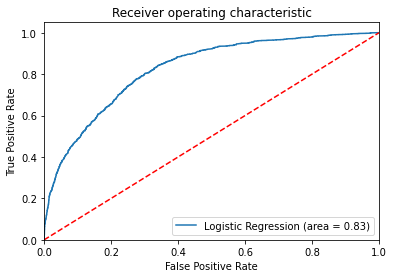

In [19]:
logit_roc_auc = roc_auc_score(os_data_y, result.predict(os_data_x))
fpr, tpr, thresholds = roc_curve(os_data_y, result.predict(os_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [20]:
for i in ['House_size_> 150 M2', 'House_size_< 50 M2', 'House_size_51-100 M2', 'BCN_over_barri_transport',
         'BCN_over_barri_future', 'MUNICIPAL POLICE_GOOD']:
    del os_data_x[i]

In [21]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513520
         Iterations 6
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.259    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 8232.9666
Date:                    2021-04-15 21:28                      BIC:                 8470.3181
No. Observations:        7950                                  Log-Likelihood:      -4082.5  
Df Model:                33                                    LL-Null:             -5510.5  
Df Residuals:            7916                                  LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          6.0000                                                              
--------------------------------------------------------------------------------------------

In [22]:
result.pvalues.sort_values(ascending=False)

Gender                                           4.018904e-01
Living_alone                                     8.928633e-02
GREEN AREAS_GOOD                                 6.317250e-02
STREETS CLEANING_GOOD                            2.564230e-02
Barri_transport_GOOD                             2.130417e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     2.102744e-02
Barri_transport_NORMAL                           9.984677e-03
BUS_GOOD                                         4.705716e-03
CIRCULATION_GOOD                                 4.394148e-03
Owns_a_car                                       2.582447e-03
ASPHALT AND STREET CONSERVATION_GOOD             1.583305e-03
PUBLIC LIGHTING_GOOD                             5.083849e-04
Time_living_in_barri_MORE THAN 10 YEARS          1.683317e-04
Barri_comparison_ONE OF THE WORST                1.742342e-05
Time_living_in_barri_LESS THAN 10 YEARS          5.233888e-06
Barri_evolution_IT IS THE SAME                   2.457935e-06
Social_c

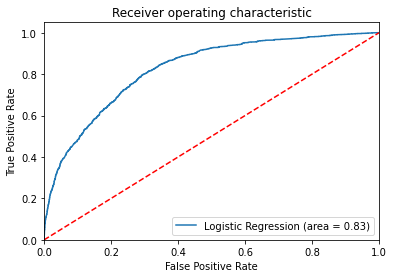

In [23]:
logit_roc_auc = roc_auc_score(os_data_y, result.predict(os_data_x))
fpr, tpr, thresholds = roc_curve(os_data_y, result.predict(os_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [24]:
del os_data_x['Gender']

In [25]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513564
         Iterations 6
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.259    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 8231.6691
Date:                    2021-04-15 21:28                      BIC:                 8462.0397
No. Observations:        7950                                  Log-Likelihood:      -4082.8  
Df Model:                32                                    LL-Null:             -5510.5  
Df Residuals:            7917                                  LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          6.0000                                                              
--------------------------------------------------------------------------------------------

In [26]:
result.pvalues.sort_values(ascending=False)

Living_alone                                     1.160208e-01
GREEN AREAS_GOOD                                 5.986694e-02
STREETS CLEANING_GOOD                            2.724787e-02
Barri_transport_GOOD                             1.984861e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     1.864098e-02
Barri_transport_NORMAL                           1.011663e-02
CIRCULATION_GOOD                                 5.029742e-03
BUS_GOOD                                         3.890754e-03
Owns_a_car                                       1.795596e-03
ASPHALT AND STREET CONSERVATION_GOOD             1.328543e-03
PUBLIC LIGHTING_GOOD                             4.883210e-04
Time_living_in_barri_MORE THAN 10 YEARS          2.026775e-04
Barri_comparison_ONE OF THE WORST                1.943705e-05
Time_living_in_barri_LESS THAN 10 YEARS          6.070727e-06
Barri_evolution_IT IS THE SAME                   1.722388e-06
Social_class_MIDDLE-MIDDLE                       1.177528e-06
CITIZEN 

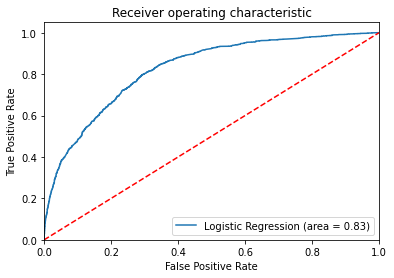

In [27]:
logit_roc_auc = roc_auc_score(os_data_y, result.predict(os_data_x))
fpr, tpr, thresholds = roc_curve(os_data_y, result.predict(os_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [28]:
del os_data_x['Living_alone']

In [29]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.513720
         Iterations 6
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.259    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 8232.1414
Date:                    2021-04-15 21:28                      BIC:                 8455.5310
No. Observations:        7950                                  Log-Likelihood:      -4084.1  
Df Model:                31                                    LL-Null:             -5510.5  
Df Residuals:            7918                                  LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          6.0000                                                              
--------------------------------------------------------------------------------------------

In [30]:
result.pvalues.sort_values(ascending=False)

GREEN AREAS_GOOD                                 5.993897e-02
STREETS CLEANING_GOOD                            2.864974e-02
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     2.138757e-02
Barri_transport_GOOD                             2.028447e-02
Barri_transport_NORMAL                           1.006699e-02
CIRCULATION_GOOD                                 5.526857e-03
Owns_a_car                                       4.827163e-03
BUS_GOOD                                         4.380905e-03
ASPHALT AND STREET CONSERVATION_GOOD             1.464825e-03
PUBLIC LIGHTING_GOOD                             4.700029e-04
Time_living_in_barri_MORE THAN 10 YEARS          1.988304e-04
Barri_comparison_ONE OF THE WORST                2.203068e-05
Time_living_in_barri_LESS THAN 10 YEARS          3.886403e-06
Barri_evolution_IT IS THE SAME                   2.729532e-06
Social_class_MIDDLE-MIDDLE                       1.920280e-06
CITIZEN SECURITY IN THE NEIGHBORHOOD_GOOD        1.685001e-06
Social_c

In [31]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                                  dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Owns_a_car                                       0.0298      0.011      2.823      0.005       0.009       0.050
BCN_over_barri_evolution                        -0.1088      0.018     -6.024      0.000      -0.144      -0.073
BCN_over_barri_satisfaction_of_living            0.1117      0.023      4.931      0.000       0.067       0.156
Time_living_in_barri_LESS THAN 10 YEARS          0.1079      0.023      4.638      0.000       0.062       0.154
Time_living_in_barri_MORE THAN 10 YEARS          0.0469      0.013      3.732      0.000       0.022      

In [32]:
result.pred_table()

array([[2884., 1091.],
       [ 926., 3049.]])

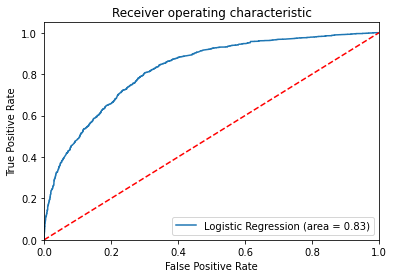

In [33]:
logit_roc_auc = roc_auc_score(os_data_y, result.predict(os_data_x))
fpr, tpr, thresholds = roc_curve(os_data_y, result.predict(os_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()